<a href="https://colab.research.google.com/github/Riturajkumari/Machine_learning/blob/main/Handling_missing_values_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some
algorithms that are not affected by missing values.**


- Missing data, or missing values, occur when you don’t have data stored for certain variables or participants. Data can go missing due to incomplete data entry, equipment malfunctions, lost files, and many other reasons.

- Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

- sample of the missing data from the Titanic dataset.

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
# titanic dataset
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- In the dataset, the blank shows the missing values.

- In Pandas, usually, missing values are represented by NaN. It stands for Not a Number.
- There can be multiple reasons why certain values are missing from the data. Reasons for the missing of data from the dataset affect the approach of handling missing data. So it’s necessary to understand why the data could be missing.


* The reason for the missing data is important to consider, because it helps you determine the type of missing data and what you need to do about it.

#### There are three main types of missing data.
- Missing completely at random (MCAR) :	Missing data are randomly distributed across the variable and unrelated to other variables.
- Missing at random (MAR)	: Missing data are not randomly distributed but they are accounted for by other observed variables.
- Missing not at random (MNAR): 	Missing data systematically differ from the observed values.

**Q2: List down techniques used to handle missing data. Give an example of each with python code.**

*6 methods to handle missing data or values. It is the part of Data Preprocessing and this is the most important step to build Machine Learning/Data Science project. The following are the most popular methods to handle missing data.*

•Ignore missing values row / Delete row

•Fill missing value manually

•Use global constant

•Measure of central tendency (Mean, Median & Mode)

•Measure of central tendency for each class

•Most probable value ( ML Algorithms)

#### Handle the missing data using python code

In [240]:
# load titanic dataset
import numpy as np
import pandas as pd


In [241]:
df= pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [242]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [243]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [244]:

# fill null values using the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [245]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [246]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [247]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [248]:
df[df['Age'].notna()]['Embarked'].mode()[0]

'S'

In [249]:
mode= df[df['Age'].notna()]['Embarked'].mode()[0]

In [250]:
df['Embarked_mode']=df['Embarked'].fillna(mode)

In [251]:
df[['Embarked_mode','Embarked']]

,Embarked_mode,Embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [252]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Embarked_mode      0
dtype: int64

In [253]:
# drop the cabin
# drop the cabin column from the dataframe
df = df.drop(columns='Cabin', axis=1)

In [254]:
# handling missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Embarked_mode    0
dtype: int64

**Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?**

- **Imbalanced data** refers to a situation, primarily in classification machine learning, where one target class represents a significant portion of observations. Imbalanced data frequently occurs in real-world problems, so it’s a situation data scientists often have to deal with.
- **Imbalanced data** can cause issues in understanding the performance of a model. When evaluating performance on imbalanced data, models that only predict well for the majority class will seem to be highly performant when looking at simple metrics such as accuracy, whilst in actuality, the model is performing poorly.
- Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

 Disease diagnosis

· Customer churn prediction

· Fraud detection

· Natural disaster

Class imbalanced is generally normal in classification problems. But, in some cases, this imbalance is quite acute where the majority class’s presence is much higher than the minority class.

In [255]:
# To check for imbalanced data you should calculate the percentage of observations that fall into each target class.
import pandas as pd

df = pd.DataFrame({"classification_target": [0, 0, 1, 1, 1],"feature": [100,110,200,250,50]})

df["classification_target"].value_counts(normalize=True)

"""
Output:
1    0.6
0    0.4
Name: classification_target, dtype: float64
"""

'\nOutput:\n1    0.6\n0    0.4\nName: classification_target, dtype: float64\n'

**Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-
sampling are required.**


Resampling techniques are one of the most widely used methods to handle imbalanced datasets
**Up-sampling**
- Let’s consider a binary classification problem where we have two classes, A and B. Suppose we have a dataset with 1000 examples, of which 950 belong to class A and 50 to class B. In this scenario, a model that blindly classifies all examples as class A will achieve an accuracy of 95%, which appears impressive. However, the model will fail to detect class B, leading to a significant loss in precision, recall, and F1-score.

 upsampling are pairs of samples from different classes that are the nearest neighbors of each other. Removing the majority class sample from a Tomek link pair can help create a more apparent boundary between the classes, improving the model’s performance.

- Down-sampling involves removing examples from the majority class to achieve balance. This method is straightforward but can result in the loss of essential information. However, it can be helpful in cases where we have a large dataset and the majority class significantly outweighs the minority class.

In [256]:
import numpy as np
import pandas as pd

In [257]:
# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [258]:
n_class_0,n_class_1

(900, 100)

In [259]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [260]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [261]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [262]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

### upsampling

In [263]:

df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [264]:
df_minority.head()

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [265]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [266]:
##Upsampling perform
from sklearn.utils import resample

In [267]:
df_minority_upsample=resample(df_minority,
                             replace=True, ## Sample With replacement
                              n_samples=len(df_majority), # to match the majority class)
                              random_state=42
                             )

In [268]:
df_minority_upsample.shape

(900, 3)

In [269]:
df_minority_upsample.shape

(900, 3)

In [270]:
df_minority_upsample['target'].value_counts()

1    900
Name: target, dtype: int64

In [271]:
df_upsampled= pd.concat([df_majority,df_minority_upsample])

In [272]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

In [273]:
df_upsampled.shape

(1800, 3)

### downsampling


In [274]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [275]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [276]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [277]:
df_majority_downsample=resample(df_majority,
                             replace=False, ## Sample Without replacement
                              n_samples=len(df_minority), # to match the minority class)
                              random_state=42
                             )

In [278]:
df_majority_downsample.shape

(100, 3)

In [279]:
df_downsample=pd.concat([df_minority,df_majority_downsample])

In [280]:
df_downsample['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

**Q5: What is data Augmentation? Explain SMOTE.**

- Data augmentation is useful to improve the performance and outcomes of machine learning models by forming new and different examples to train datasets. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately.

For machine learning models, collecting and labeling data can be exhausting and costly processes. Transformations in datasets by using data augmentation techniques allow companies to reduce these operational costs.

## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [281]:
from sklearn.datasets import make_classification

In [282]:
## X independent feature
## y dependent feature
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [283]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [284]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [285]:
final_df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

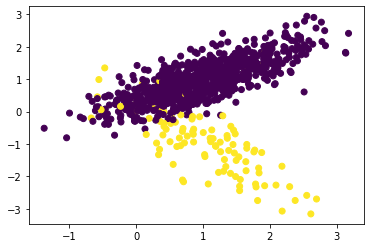

In [286]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [287]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [288]:
from imblearn.over_sampling import SMOTE

In [289]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [290]:
X.shape

(1788, 2)

In [291]:
len(y[y==0])

894

In [292]:
len(y[y==1])

894

In [293]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

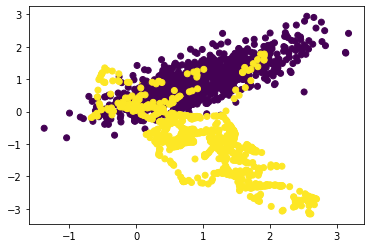

In [294]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

**Q6: What are outliers in a dataset? Why is it essential to handle outliers?**

- A data point that lies outside the overall distribution of the dataset is called an outlier of the data. An outlier is an observation point that is distant from other observations statistically, i.e. Outlier is separate or different from a point or set of points in the group.

**Effects of Outliers in data:**
Due to variability in data or experimental errors like mistakes in data collection, recording, and entry, the datasets contain outliers. In the case of statistical analysis, it can cause major problems like :

Data skewing

Errors in the mean of the data set.

Errors in the standard deviation of the data set.

In different datasets, we have to deal specifically with two types of outliers.

Uni variate (one variable outlier), where single variable outlier analysis is done.

Multivariate outliers (Two or more variable outliers), If we have one categorical value, then with that we can check multiple continuous variables.

## 5 number Summary
1. Minimum Value
2. Q1- 25 percentile
3. Median
4. Q3- 75 percentile
5. MAximum

In [295]:
import numpy as np
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,1000,1100]

In [296]:
## [Lower Fence<---> Higher Fence]
Q1=np.percentile(lst_marks,[25])
print(Q1)

[54.]


In [297]:
minimum,Q1,Q2,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [298]:
IQR=Q3-Q1
print(IQR)

35.5


In [299]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)

In [300]:
lower_fence,higher_fence

(0.75, 142.75)

In [301]:
outliers=[]
for i in lst_marks:
    if i>=0.75 and i<=142.75:
        print("This element is not an outlier")
    else:
        outliers.append(i)

This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier


In [302]:
outliers

[1000, 1100]

**Finding outliers with visualization tools**
- scatter plots
- Box plot

In [303]:
import seaborn as sns

<Axes: >

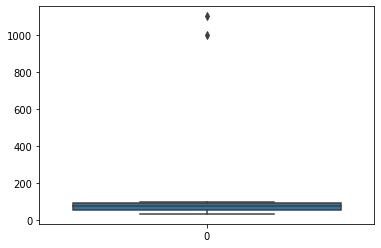

In [304]:
sns.boxplot(lst_marks)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


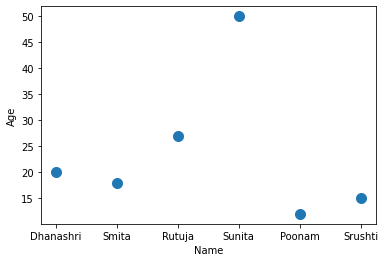

In [305]:
# Program to draw scatter plot using Dataframe.plot
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Prepare data
data={'Name':['Dhanashri', 'Smita', 'Rutuja',
			'Sunita', 'Poonam', 'Srushti'],
	'Age':[20, 18, 27, 50, 12, 15]}

# Load data into DataFrame
df = pd.DataFrame(data = data);

# Draw a scatter plot
df.plot.scatter(x = 'Name', y = 'Age', s = 100);


**Q7: You are working on a project that requires analyzing customer data. However, you notice that some of
the data is missing. What are some techniques you can use to handle the missing data in your analysis?**

In [306]:
# importing pandas as pd
import pandas as pd

# importing numpy as np
import numpy as np

# dictionary of lists
customer_data = {'Annual_income':[100, 900, np.nan, 955,np.nan,500,480],
                 'Speding_Score': [30, 45, 56, np.nan,50,70,45],
        'Age':[np.nan, 40, 30, 45,34,23,50]}
  

# creating a dataframe from list
df = pd.DataFrame(customer_data)

# using isnull() function
df.isnull()


,Annual_income,Speding_Score,Age
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False
4,True,False,False
5,False,False,False
6,False,False,False


In [307]:

# fill null values using the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [308]:
# 
# fill null values using the mean
df['Annual_income'].fillna(df['Annual_income'].mean(), inplace=True)

In [309]:

# fill null values using the mean
df['Speding_Score'].fillna(df['Speding_Score'].mean(), inplace=True)

In [310]:
df.isnull().sum()

Annual_income    0
Speding_Score    0
Age              0
dtype: int64

**Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are
some strategies you can use to determine if the missing data is missing at random or if there is a pattern
to the missing data?**

In [311]:
df = pd.read_csv('/content/drive/MyDrive/Big-Mart-sales prediction/train.csv')

In [312]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [313]:
df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [314]:
# getting categorical and numerical columns
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
num_cols = df.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [315]:
# # numerical col of central tendancy check
# percentage missing values
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


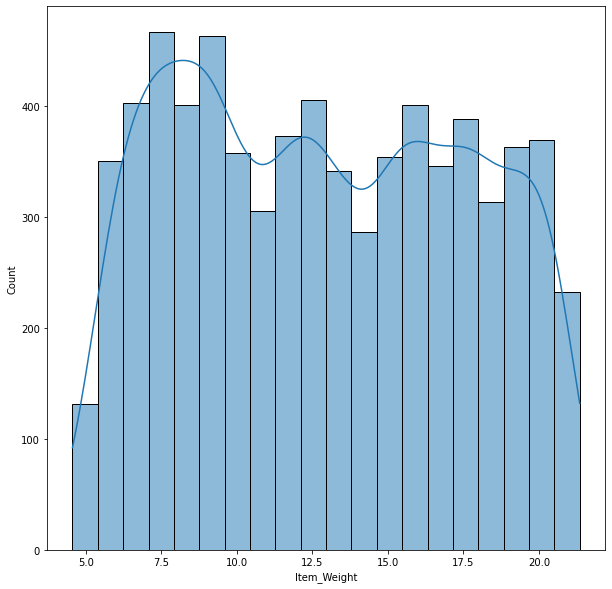

In [316]:


fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.histplot(data = df, x='Item_Weight', kde=True)
plt.show()

In [317]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [318]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [319]:
(2410+2793+2388+932)

8523

In [320]:
# percentage of numerical values
df.isnull().sum()/len(df)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [321]:
# using isnull() function
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing Values Handaling

In [322]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [323]:

# fill null values using the mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [324]:
#Most repetative value in Out_Size , Mode= maximum reapeated values
df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [325]:
#Filling null values with maximum repeated values
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')

In [326]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the
dataset do not have the condition of interest, while a small percentage do. What are some strategies you
can use to evaluate the performance of your machine learning model on this imbalanced dataset?**

In [327]:
# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [328]:
n_class_0,n_class_1

(900, 100)

In [329]:
class_0 = pd.DataFrame({
    'patients': np.random.normal(loc=0, scale=1, size=n_class_0),
    'Age': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'patients': np.random.normal(loc=2, scale=1, size=n_class_1),
    'Age': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [330]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [331]:
df.head()

,patients,Age,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [332]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [333]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [334]:
##Upsampling perform
from sklearn.utils import resample

In [335]:
df_minority_upsample=resample(df_minority,
                             replace=True, ## Sample With replacement
                              n_samples=len(df_majority), # to match the majority class)
                              random_state=42
                             )

In [336]:
df_minority_upsample.shape

(900, 3)

In [337]:
df_minority_upsample['target'].value_counts()

1    900
Name: target, dtype: int64

In [338]:
df_upsampled= pd.concat([df_majority,df_minority_upsample])

In [339]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

**Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is
unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to
balance the dataset and down-sample the majority class?**

In [340]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [341]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [342]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [343]:
# downsampling the majority class
df_majority_downsample=resample(df_majority,
                             replace=False, ## Sample Without replacement
                              n_samples=len(df_minority), # to match the minority class)
                              random_state=42
                             )

In [344]:
df_majority_downsample.shape

(100, 3)

In [345]:
df_downsample=pd.concat([df_minority,df_majority_downsample])

In [346]:
df_downsample['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

**Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a
project that requires you to estimate the occurrence of a rare event. What methods can you employ to
balance the dataset and up-sample the minority class?**

### Upsampling

In [347]:

df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [348]:
df_minority.head()

,feature_1,feature_2,target
900,-0.643425,2.571923,1
901,1.551009,1.782767,1
902,1.641093,2.054318,1
903,2.133194,2.155998,1
904,1.355758,2.467810,1


In [349]:
df_majority.head()

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0


In [350]:
##Upsampling perform
from sklearn.utils import resample

In [351]:
df_minority_upsample=resample(df_minority,
                             replace=True, ## Sample With replacement
                              n_samples=len(df_majority), # to match the majority class)
                              random_state=42
                             )

In [352]:
df_minority_upsample.shape

(900, 3)

In [353]:
df_minority_upsample['target'].value_counts()

1    900
Name: target, dtype: int64

In [354]:
df_upsampled= pd.concat([df_majority,df_minority_upsample])

In [355]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64